In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
from collections import Counter

In [2]:
data = pd.read_csv("../MDS_Assignment3 Mining Process/MiningProcess_Flotation_Plant_Database.csv")
data = data.replace(",", ".", regex=True) 
display(data.head(3))
print('data.shape:', data.shape)

data_X = data.iloc[:, 1:-2].astype(float) # params
data_y = data.iloc[:, -1].astype(float) # label

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,...,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31


data.shape: (737453, 24)


### Overview
no nan value, total number of records: 737,453.

In [32]:
print('num of data:', len(data_X))
data.isna().sum()

num of data: 737453


date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

### Label

Label has 85684 of outliers (value > 5), takes 11.62% of total Label.


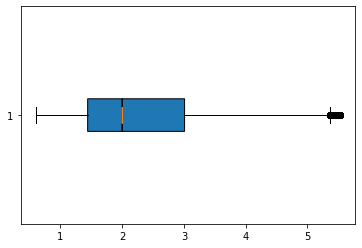

In [11]:
bp = plt.boxplot(data_y, patch_artist = True,
                notch ='True', vert = 0)
outlier_len = len(data_y[data_y > 5])
print(f'Label has {outlier_len} of outliers (value > 5), takes {outlier_len/len(data_y)*100:.2f}% of total Label.')

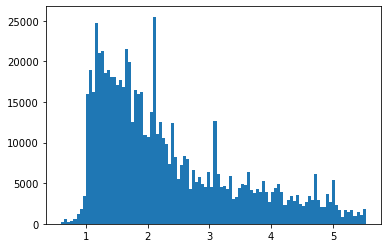

In [20]:
fig = plt.hist(data_y, bins=100)
# fig.show()

### Parameters

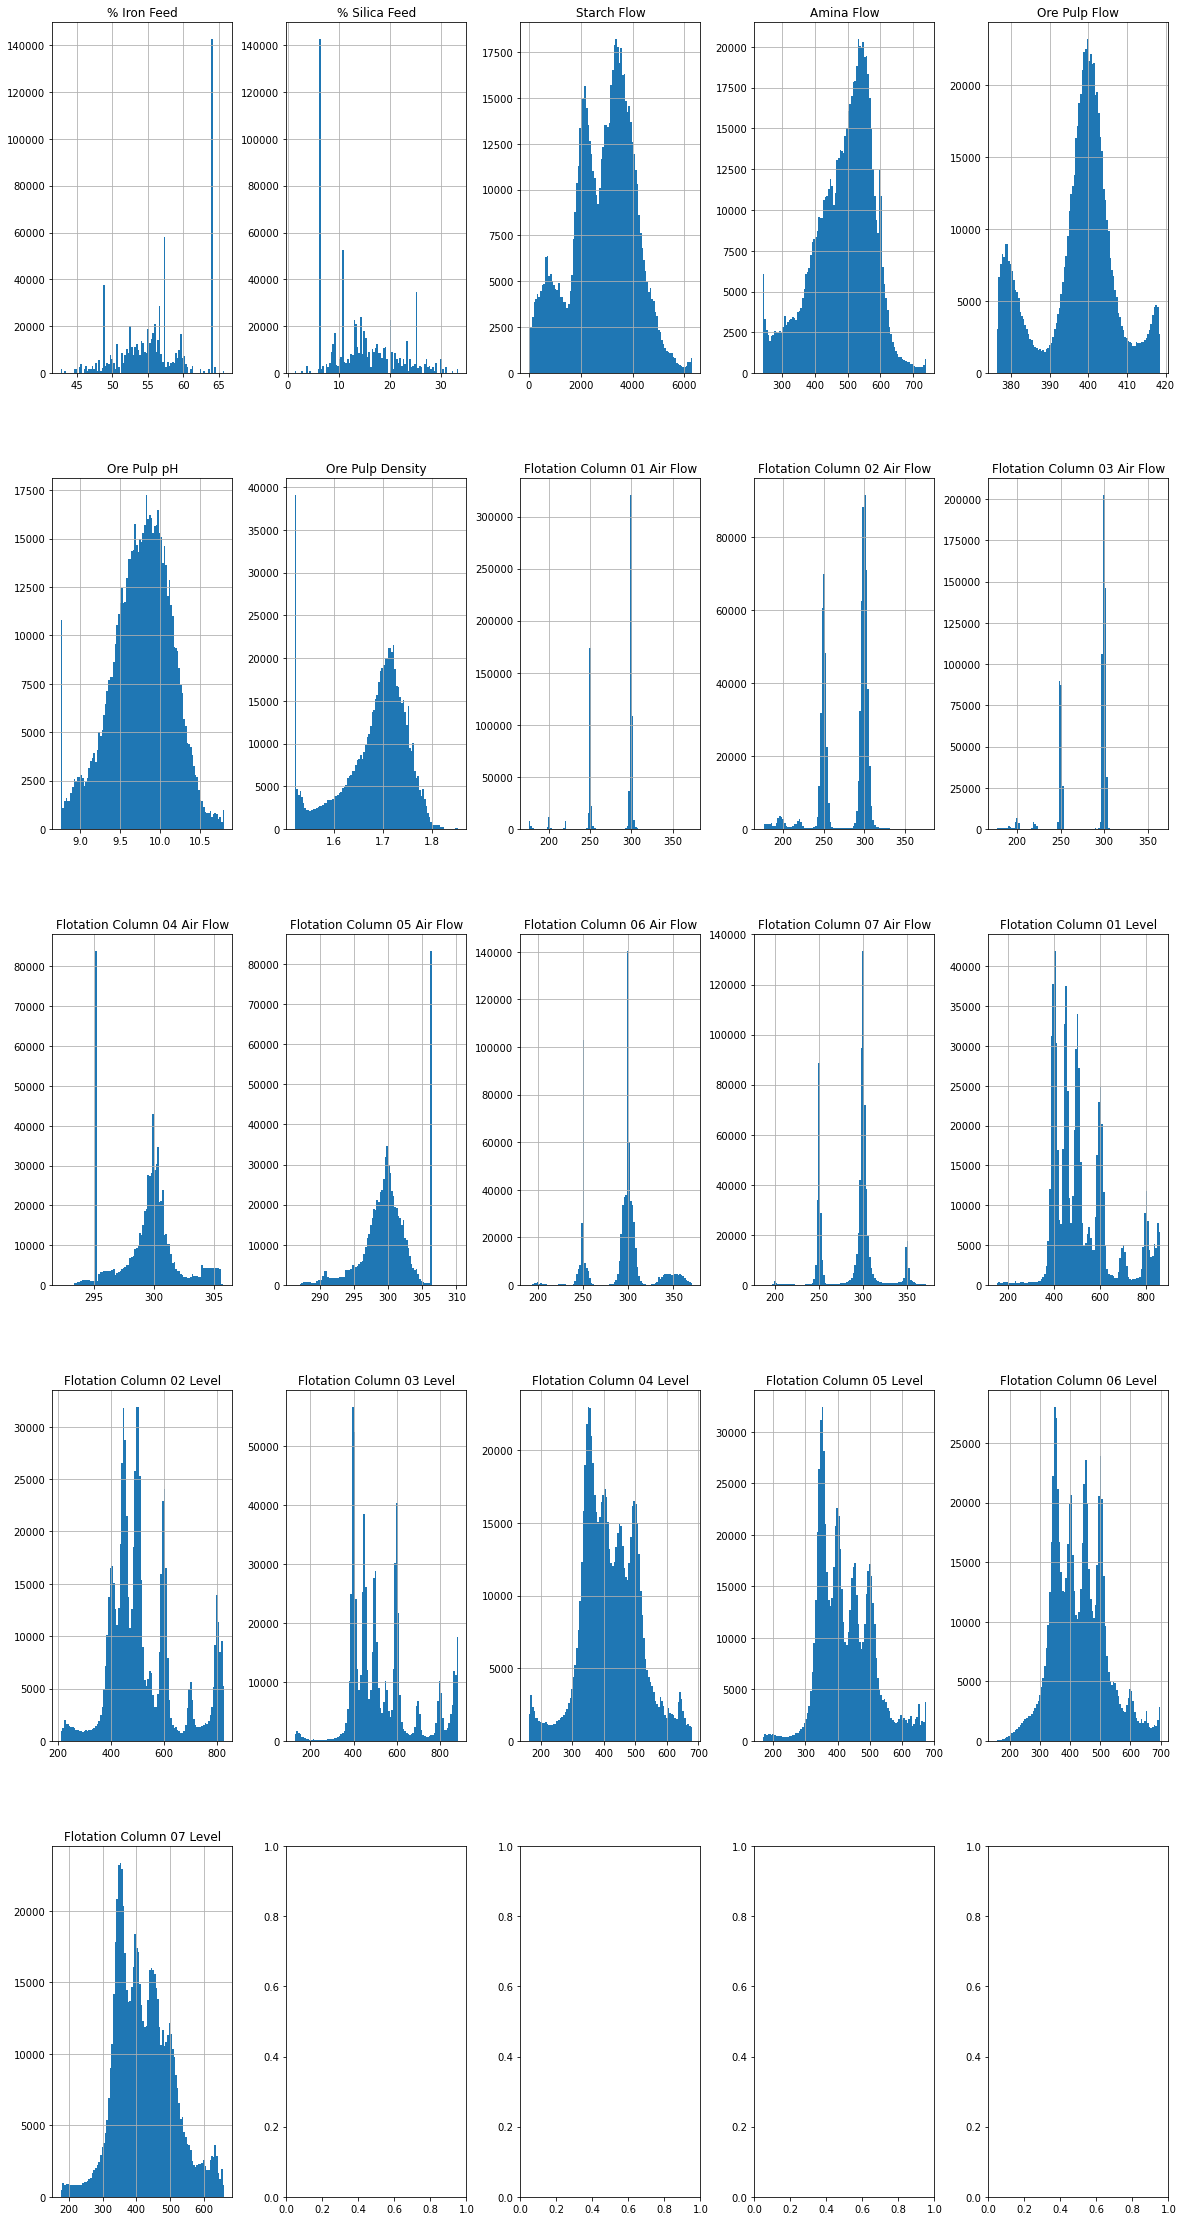

In [31]:
fig, axes = plt.subplots(len(data_X.columns)//4, 5, figsize=(20, 40))

i = 0
for triaxis in axes:
    for axis in triaxis:
        data_X.hist(column = data_X.columns[i], bins = 100, ax=axis)
        i = i+1
        if i == len(data_X.columns):
            break

### 觀察 Time 欄位

In [3]:
data['date'].head()

0    2017-03-10 01:00:00
1    2017-03-10 01:00:00
2    2017-03-10 01:00:00
3    2017-03-10 01:00:00
4    2017-03-10 01:00:00
Name: date, dtype: object

In [ ]:
from datetime import datetime # generate
from dateutil import parser # parse
datelist = [parser.parse(d) for d in data['date']]

In [12]:
# 03/10 ~ 09/09, 共 172 天
days = set()
[days.add(x.strftime('%m/%d')) for x in datelist]
days

{'03/10',
 '03/11',
 '03/12',
 '03/13',
 '03/14',
 '03/15',
 '03/16',
 '03/29',
 '03/30',
 '03/31',
 '04/01',
 '04/02',
 '04/03',
 '04/04',
 '04/05',
 '04/06',
 '04/07',
 '04/08',
 '04/09',
 '04/10',
 '04/11',
 '04/12',
 '04/13',
 '04/14',
 '04/15',
 '04/16',
 '04/17',
 '04/18',
 '04/19',
 '04/20',
 '04/21',
 '04/22',
 '04/23',
 '04/24',
 '04/25',
 '04/26',
 '04/27',
 '04/28',
 '04/29',
 '04/30',
 '05/01',
 '05/02',
 '05/03',
 '05/04',
 '05/05',
 '05/06',
 '05/07',
 '05/08',
 '05/09',
 '05/10',
 '05/11',
 '05/12',
 '05/13',
 '05/14',
 '05/15',
 '05/16',
 '05/17',
 '05/18',
 '05/19',
 '05/20',
 '05/21',
 '05/22',
 '05/23',
 '05/24',
 '05/25',
 '05/26',
 '05/27',
 '05/28',
 '05/29',
 '05/30',
 '05/31',
 '06/01',
 '06/02',
 '06/03',
 '06/04',
 '06/05',
 '06/06',
 '06/07',
 '06/08',
 '06/09',
 '06/10',
 '06/11',
 '06/12',
 '06/13',
 '06/14',
 '06/15',
 '06/16',
 '06/17',
 '06/18',
 '06/19',
 '06/20',
 '06/21',
 '06/22',
 '06/23',
 '06/24',
 '06/25',
 '06/26',
 '06/27',
 '06/28',
 '06/29',


In [11]:
datelist[0].strftime('%m/%d')

'03/10'

In [13]:
len(days)

172

In [ ]:
# look into day 03/12
# 這一天有 4320 個樣本，每 20 秒記錄一次 (每分鐘計3次)
[days.add(x.strftime('%m/%d')) for x in datelist]

In [23]:
len(datelist) / 4320 # 每天的樣本數不一樣多

170.70671296296297

In [14]:
datelist[0].month

3

In [17]:
day0312 = []
for x in datelist:
    if x.month == 3 and x.day == 12:
        day0312.append(x)
len(day0312)

4320

In [20]:
4320 / (24*60)

3.0

In [22]:
hour0312 = set()
[hour0312.add(x.hour) for x in day0312]
hour0312

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23}